Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from glob import glob

In [3]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive/


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
%cd gdrive/MyDrive/

/content/gdrive/MyDrive


In [5]:
%cd 'CNN_assignment.zip (Unzipped Files)'/'Skin cancer ISIC The International Skin Imaging Collaboration'
!ls

/content/gdrive/MyDrive/CNN_assignment.zip (Unzipped Files)/Skin cancer ISIC The International Skin Imaging Collaboration
Test  Train


In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Train")
data_dir_test = pathlib.Path('Test')

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [90]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, image_size=(img_height,img_width), seed=123,validation_split=0.2, subset='training', batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [91]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, image_size=(img_height,img_width), seed=123,validation_split=0.2, subset='validation', batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [95]:
train_ds.list_files('*')

<ShuffleDataset shapes: (), types: tf.string>

In [92]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [53]:
class_data_mapping = {i: [] for i in class_names}
temp_images = []
temp_labels = []
for images, labels in train_ds.take(3):
  temp_images.extend(images)
  temp_labels.extend(labels)

In [56]:
print(len(temp_images))
print(len(temp_labels))

96
96


In [57]:
for i in range(len(temp_images)):
    if len(class_data_mapping[class_names[temp_labels[i]]]) == 0:
        class_data_mapping[class_names[temp_labels[i]]].append(i)
print(class_data_mapping)

{'actinic keratosis': [16], 'basal cell carcinoma': [7], 'dermatofibroma': [4], 'melanoma': [2], 'nevus': [1], 'pigmented benign keratosis': [0], 'seborrheic keratosis': [40], 'squamous cell carcinoma': [14], 'vascular lesion': [3]}


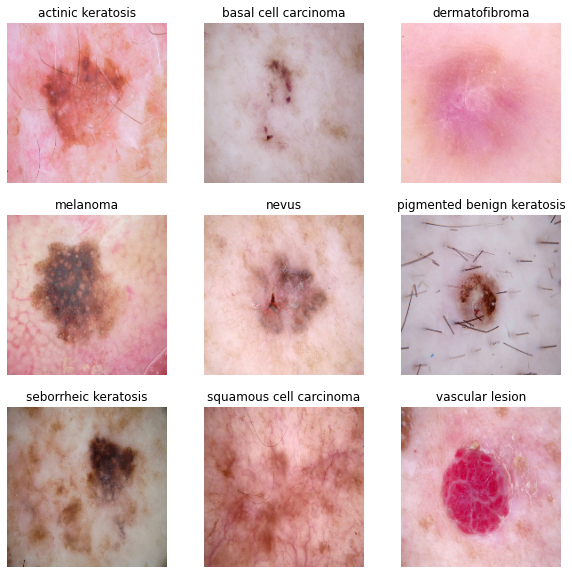

In [58]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
i = 0
for key,value in class_data_mapping.items():
  ax = plt.subplot(3, 3, i + 1)
  i+=1
  plt.imshow(temp_images[value[0]].numpy().astype("uint8"))
  plt.title(key)
  plt.axis("off")
    

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [38]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [19]:
### Your code goes here

model = Sequential()
num_classes = len(class_names)
model.add(layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Convolution2D(32,3, padding='same',activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Convolution2D(64,3, padding='same',activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Convolution2D(64,3, padding='same',activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(num_classes))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [20]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'] )

In [21]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 64)       

In [22]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  workers=-1
)

Epoch 1/20
56/56 [==============================] - 15s 242ms/step - loss: 2.0444 - accuracy: 0.2640 - val_loss: 1.7057 - val_accuracy: 0.4318
Epoch 2/20
56/56 [==============================] - 15s 237ms/step - loss: 1.6184 - accuracy: 0.4185 - val_loss: 1.7059 - val_accuracy: 0.4273
Epoch 3/20
56/56 [==============================] - 15s 237ms/step - loss: 1.4270 - accuracy: 0.5162 - val_loss: 1.4970 - val_accuracy: 0.5235
Epoch 4/20
56/56 [==============================] - 15s 239ms/step - loss: 1.3402 - accuracy: 0.5324 - val_loss: 1.4877 - val_accuracy: 0.5078
Epoch 5/20
56/56 [==============================] - 15s 237ms/step - loss: 1.2872 - accuracy: 0.5441 - val_loss: 1.4072 - val_accuracy: 0.5190
Epoch 6/20
56/56 [==============================] - 15s 237ms/step - loss: 1.2029 - accuracy: 0.5720 - val_loss: 1.5319 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 15s 235ms/step - loss: 1.1119 - accuracy: 0.6138 - val_loss: 1.4248 - val_accuracy: 0.5190

### Visualizing training results

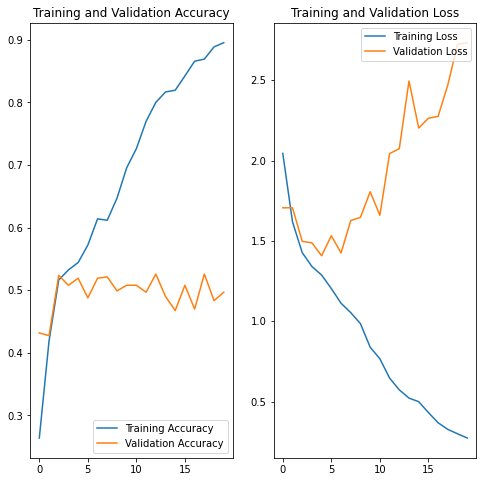

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

As we can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around 43% accuracy on the validation set.

Since training loss > validation loss, the model did **overfit**.

Training accuracy: 89.51%

Validation accuracy: 49.66%



### Write your findings here

In [24]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

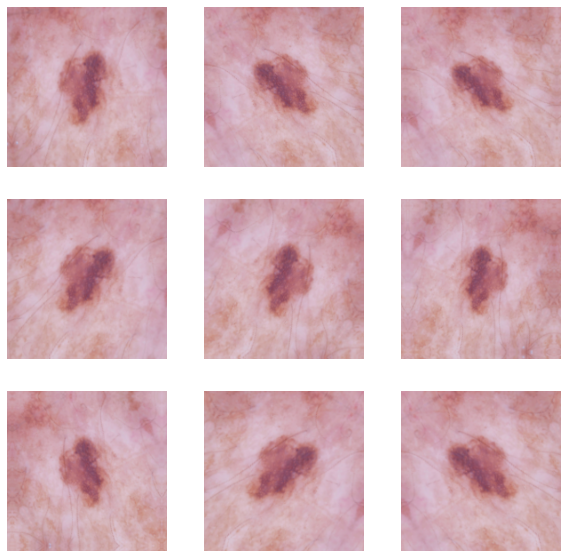

In [25]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [32]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.1)
])

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [33]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'] )

In [34]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 64)       

### Training the model

In [35]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  workers=-1
)

Epoch 1/20
56/56 [==============================] - 16s 246ms/step - loss: 2.2324 - accuracy: 0.2132 - val_loss: 1.9354 - val_accuracy: 0.2819
Epoch 2/20
56/56 [==============================] - 15s 242ms/step - loss: 1.9365 - accuracy: 0.2902 - val_loss: 1.8734 - val_accuracy: 0.3266
Epoch 3/20
56/56 [==============================] - 15s 243ms/step - loss: 1.8796 - accuracy: 0.3158 - val_loss: 1.9471 - val_accuracy: 0.2931
Epoch 4/20
56/56 [==============================] - 15s 242ms/step - loss: 1.7529 - accuracy: 0.3655 - val_loss: 1.5500 - val_accuracy: 0.4586
Epoch 5/20
56/56 [==============================] - 15s 248ms/step - loss: 1.5624 - accuracy: 0.4526 - val_loss: 1.4633 - val_accuracy: 0.4944
Epoch 6/20
56/56 [==============================] - 15s 249ms/step - loss: 1.4428 - accuracy: 0.4682 - val_loss: 1.4116 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 15s 250ms/step - loss: 1.4054 - accuracy: 0.5017 - val_loss: 1.3552 - val_accuracy: 0.5280

### Visualizing the results

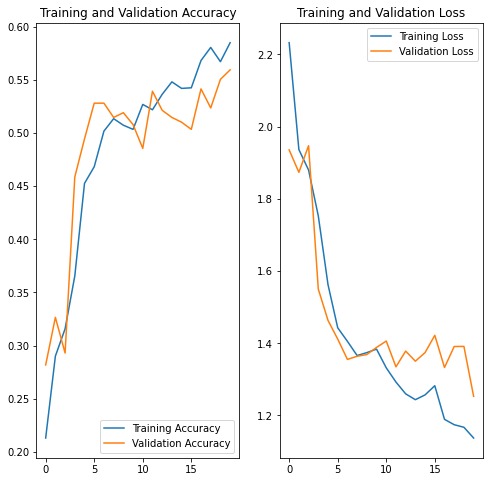

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Now the overfitting is highly reduced as compared to the previous model due to the data augmentation layer.

Training accuracy: 58.48%

Validation accuracy: 55.95%


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [119]:
initial_state = dict((i, 0) for i in range(num_classes))
for images,labels in train_ds.take(-1):
  for i in range(len(images)):
    initial_state[tf.get_static_value(labels[i])]+=1
final_class_state = dict((class_names[i],initial_state[i]) for i in range(len(class_names)))
print(final_class_state)

{'actinic keratosis': 92, 'basal cell carcinoma': 309, 'dermatofibroma': 77, 'melanoma': 352, 'nevus': 277, 'pigmented benign keratosis': 370, 'seborrheic keratosis': 58, 'squamous cell carcinoma': 142, 'vascular lesion': 115}


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
'seborrheic keratosis' has the least number of samples of 58.
#### - Which classes dominate the data in terms proportionate number of samples?
'pigmented benign keratosis' dominate the data interms proportionate number of samples with total of 370 samples.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [120]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [123]:
data_dir_train

PosixPath('Train')

In [124]:
path_to_training_dataset='Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC965029490>: 100%|██████████| 500/500 [00:19<00:00, 26.24 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC96511EED0>: 100%|██████████| 500/500 [00:19<00:00, 25.78 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC9650BC690>: 100%|██████████| 500/500 [00:18<00:00, 26.63 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC964648650>: 100%|██████████| 500/500 [01:22<00:00,  6.04 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1504x1129 at 0x7FC96628D710>: 100%|██████████| 500/500 [01:15<00:00,  6.58 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC8645D2110>: 100%|██████████| 500/500 [00:19<00:00, 25.30 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC978105150>: 100%|██████████| 500/500 [00:42<00:00, 11.85 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC978063890>: 100%|██████████| 500/500 [00:19<00:00, 25.77 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC966327910>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC964648510>: 100%|██████████| 500/500 [00:19<00:00, 25.81 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [125]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [126]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030825.jpg_0f895636-0913-417f-aa68-dd6dd0dc370b.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030408.jpg_3995c28d-2a22-455a-8972-d736e4072a7d.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031506.jpg_be1d9cf2-711d-4df7-9499-96c7979fade0.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027896.jpg_eb13e2ee-9cd5-4631-b3d7-6484b20099f8.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027452.jpg_03ae7ac2-edf5-4f8f-8585-131bf664b840.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028393.jpg_921c5599-ae3e-4810-b5c3-09deddb6aabb.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033456.jpg_286da00c-9c27-4f34-812b-aceb863f1295.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026905.jpg_ece18fe6-734d-4504-9212-53668b28586f.jpg',
 'Train/actinic keratosis/output/actinic

In [127]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [129]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [131]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2

,Path,Label
0,Train/actinic keratosis/output/actinic keratos...,actinic keratosis
1,Train/actinic keratosis/output/actinic keratos...,actinic keratosis
2,Train/actinic keratosis/output/actinic keratos...,actinic keratosis
3,Train/actinic keratosis/output/actinic keratos...,actinic keratosis
4,Train/actinic keratosis/output/actinic keratos...,actinic keratosis
...,...,...
4495,Train/vascular lesion/output/vascular lesion_o...,vascular lesion
4496,Train/vascular lesion/output/vascular lesion_o...,vascular lesion
4497,Train/vascular lesion/output/vascular lesion_o...,vascular lesion
4498,Train/vascular lesion/output/vascular lesion_o...,vascular lesion


In [132]:
df2['Label'].value_counts()

dermatofibroma                500
basal cell carcinoma          500
melanoma                      500
nevus                         500
squamous cell carcinoma       500
seborrheic keratosis          500
vascular lesion               500
pigmented benign keratosis    500
actinic keratosis             500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [133]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [142]:
data_dir_train='Train/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size = (img_height, img_width),
  batch_size=batch_size
  )

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [144]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [145]:
## your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.Normalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [146]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'] )

#### **Todo:**  Train your model

In [147]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  workers=-1
)

Epoch 1/30
169/169 [==============================] - 35s 198ms/step - loss: 2.1798 - accuracy: 0.1819 - val_loss: 1.8652 - val_accuracy: 0.2665
Epoch 2/30
169/169 [==============================] - 34s 196ms/step - loss: 1.7100 - accuracy: 0.3492 - val_loss: 1.5724 - val_accuracy: 0.4009
Epoch 3/30
169/169 [==============================] - 34s 194ms/step - loss: 1.5037 - accuracy: 0.4132 - val_loss: 1.4347 - val_accuracy: 0.4625
Epoch 4/30
169/169 [==============================] - 34s 194ms/step - loss: 1.4124 - accuracy: 0.4581 - val_loss: 1.3136 - val_accuracy: 0.5004
Epoch 5/30
169/169 [==============================] - 34s 194ms/step - loss: 1.3510 - accuracy: 0.4833 - val_loss: 1.2866 - val_accuracy: 0.5004
Epoch 6/30
169/169 [==============================] - 33s 193ms/step - loss: 1.2760 - accuracy: 0.5006 - val_loss: 1.2354 - val_accuracy: 0.5323
Epoch 7/30
169/169 [==============================] - 34s 193ms/step - loss: 1.2498 - accuracy: 0.5121 - val_loss: 1.2263 - val_ac

#### **Todo:**  Visualize the model results

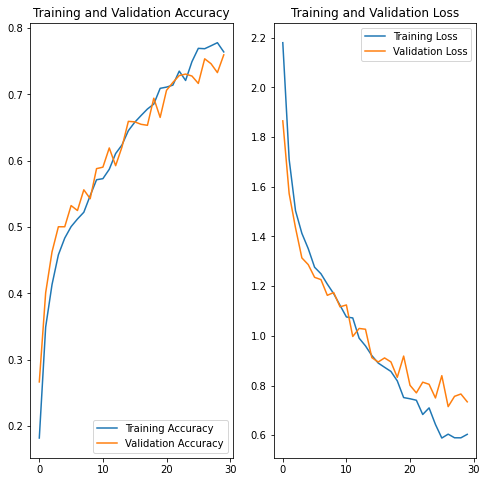

In [148]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



The overfitting is resolved using class rebalancing and the data augmentation. The class rebalance helped a lot in reducing overfitting by increasing the training size. From here, for further optimization, dropouts layer can be used along with the above layers.

Training accuracy is 76.39%

Validation accuracy is 75.95%